In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from preprocessinganddata import load_classificationdata , cnn_parameters

In [2]:
X_train , y_train , X_val, X_test, y_val, y_test , num_classes = load_classificationdata()

In [3]:
def build_model(optimizer, activation, filters1, filters2):
    model = Sequential([
        Conv2D(filters1, (3, 3), activation=activation, input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(filters2, (3, 3), activation=activation),
        MaxPooling2D((2, 2)),
        Conv2D(filters2, (3, 3), activation=activation),
        Flatten(),
        Dense(64, activation=activation),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [4]:
from itertools import product

def grid_search_best_model(param_combinations):
    best_params = None
    best_accuracy = 0
    best_model = None
    for params in param_combinations:
        print(f"Testing configuration: {params}")
        
        model = build_model(
            optimizer=params['optimizer'],
            activation=params['activation'],
            filters1=params['filters1'],
            filters2=params['filters2']
        )
        
        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=params['epochs'],
            batch_size=params['batch_size'],
            verbose=0
        )
        
        val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
        print(f"Validation Accuracy: {val_accuracy}")
        
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_params = params
            best_model = model

    print(f"Best Configuration: {best_params}")
    print(f"Best Validation Accuracy: {best_accuracy}")
    return best_params , best_accuracy , best_model


In [5]:
param_grid = cnn_parameters()

keys, values = zip(*param_grid.items())
param_combinations = [dict(zip(keys, v)) for v in product(*values)]
# best_model , best_parameters , best_accuracy = grid_search_best_model(param_combinations)

***I got the paraemters used below using grid search i am passing it manually as i do not want to run the grid search again and again so check the readme file and apply the parameters manually.***

In [6]:
final_model = build_model(
    optimizer='adam',
    activation='tanh',
    filters1=32,
    filters2=64
)

history = final_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    verbose=1
)

Epoch 1/10
219/219 [==============================] - 5s 16ms/step - loss: 0.4475 - accuracy: 0.8687 - val_loss: 0.1663 - val_accuracy: 0.9540
Epoch 2/10
219/219 [==============================] - 4s 16ms/step - loss: 0.1425 - accuracy: 0.9580 - val_loss: 0.1129 - val_accuracy: 0.9660
Epoch 3/10
219/219 [==============================] - 3s 15ms/step - loss: 0.0930 - accuracy: 0.9730 - val_loss: 0.0940 - val_accuracy: 0.9747
Epoch 4/10
219/219 [==============================] - 3s 15ms/step - loss: 0.0593 - accuracy: 0.9849 - val_loss: 0.0780 - val_accuracy: 0.9787
Epoch 5/10
219/219 [==============================] - 3s 15ms/step - loss: 0.0469 - accuracy: 0.9876 - val_loss: 0.0731 - val_accuracy: 0.9780
Epoch 6/10
219/219 [==============================] - 3s 16ms/step - loss: 0.0269 - accuracy: 0.9946 - val_loss: 0.0591 - val_accuracy: 0.9820
Epoch 7/10
219/219 [==============================] - 3s 15ms/step - loss: 0.0270 - accuracy: 0.9936 - val_loss: 0.0707 - val_accuracy: 0.9793

In [7]:
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

47/47 [==============================] - 1s 18ms/step - loss: 0.0650 - accuracy: 0.9833
Test Loss: 0.06495770812034607, Test Accuracy: 0.9833333492279053


In [8]:
final_model.save("convolutional_model.h5")

c:\Miniconda\envs\deeplearning\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
final_model = load_model("convolutional_model.h5")

print("Model loaded successfully")

Model loaded successfully


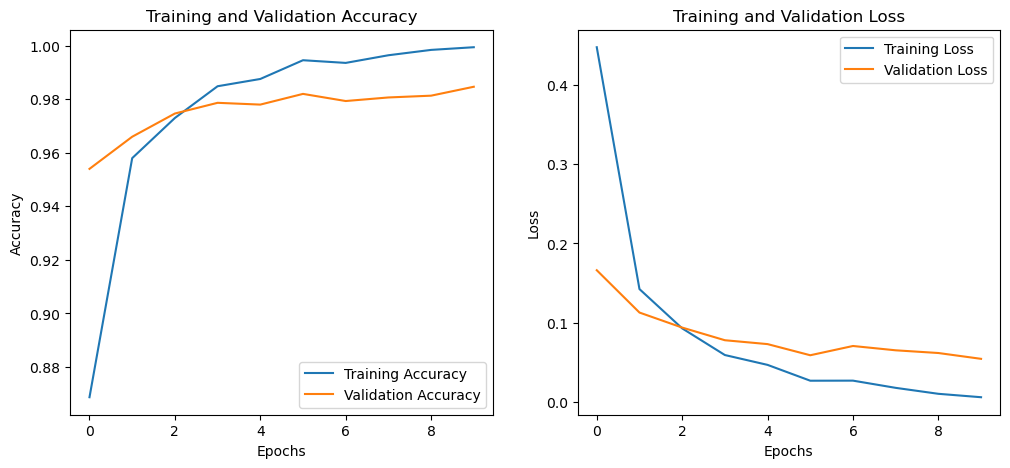

47/47 [==============================] - 1s 8ms/step


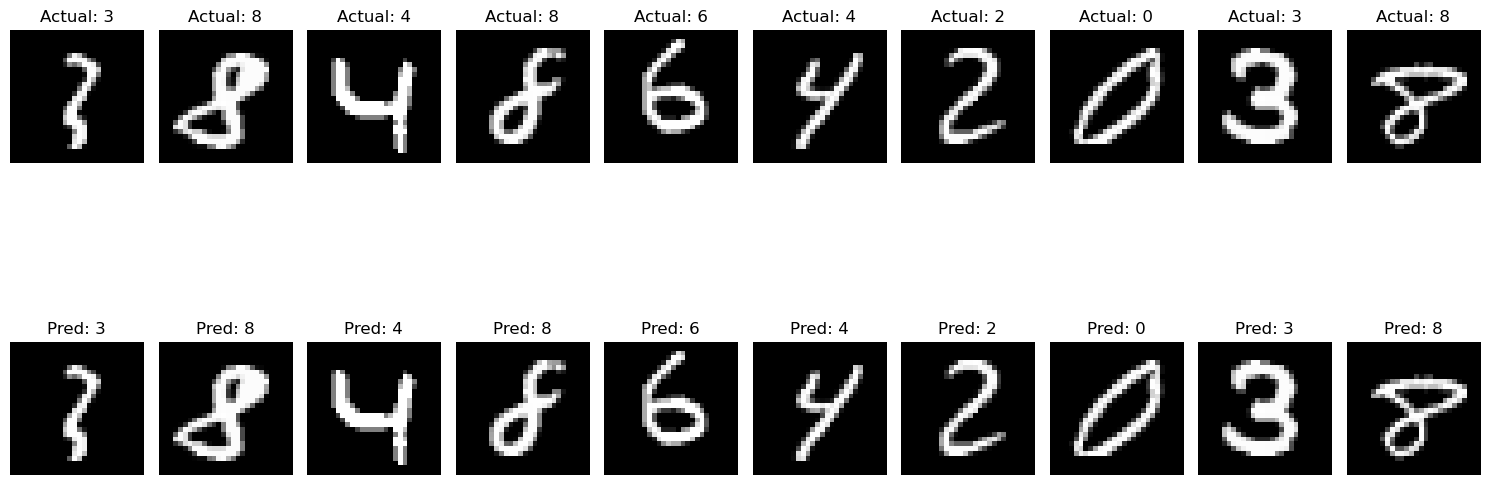

In [10]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

# Predict and compare predicted vs actual values
y_pred = final_model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

num_samples = 10
indices = np.random.choice(len(X_test), num_samples, replace=False)

plt.figure(figsize=(15, 8))

for i, idx in enumerate(indices):
    # Actual Image
    plt.subplot(2, num_samples, i + 1) 
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray') 
    plt.title(f"Actual: {np.argmax(y_test[idx])}")
    plt.axis('off')
    
    # Predicted Image
    plt.subplot(2, num_samples, i + 1 + num_samples)  
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred_labels[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()